In [2]:
!pip install tensorflow

,Requirement already satisfied: absl-py>=1.0.0 in /usr/local/lib/python3.10/dist-packages (from tensorflow) (1.4.0)
,Requirement already satisfied: astunparse>=1.6.0 in /usr/local/lib/python3.10/dist-packages (from tensorflow) (1.6.3)
,Requirement already satisfied: flatbuffers>=24.3.25 in /usr/local/lib/python3.10/dist-packages (from tensorflow) (24.3.25)
,Requirement already satisfied: gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 in /usr/local/lib/python3.10/dist-packages (from tensorflow) (0.6.0)
,Requirement already satisfied: google-pasta>=0.1.1 in /usr/local/lib/python3.10/dist-packages (from tensorflow) (0.2.0)
,Requirement already satisfied: h5py>=3.10.0 in /usr/local/lib/python3.10/dist-packages (from tensorflow) (3.11.0)
,Requirement already satisfied: libclang>=13.0.0 in /usr/local/lib/python3.10/dist-packages (from tensorflow) (18.1.1)
,Requirement already satisfied: ml-dtypes<0.5.0,>=0.3.1 in /usr/local/lib/python3.10/dist-packages (from tensorflow) (0.4.1)
,Requirement already sat

In [3]:
from tensorflow.keras.datasets import imdb
(training_data, training_labels), (testing_data, testing_labels) = imdb.load_data(
    num_words=10000)

In [4]:
print(training_data,training_data.shape)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
, list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,

In [5]:
training_labels[0]

1

In [6]:
len(training_labels)

25000

In [7]:
len(training_labels)

25000

In [8]:
testing_labels[0]

0

In [9]:
max([max(sequence) for sequence in testing_data])

9999

In [10]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in training_data[0]])

,1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [11]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

DATA PREPARATION

In [12]:

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [13]:
#Data Vectorization
x_training = vectorize_sequences(training_data)
x_testing = vectorize_sequences(testing_data)

In [14]:
x_training[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [15]:
x_testing[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [16]:
#label vectorization
y_training = np.asarray(training_labels).astype("float32")
y_testing = np.asarray(testing_labels).astype("float32")

In [17]:
#Building model using relu and compiling it
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [18]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [22]:
x_val = x_training[:10000]
partial_x_training = x_training[10000:]
y_val = y_training[:10000]
partial_y_training = y_training[10000:]

In [23]:
history = model.fit(partial_x_training,
                    partial_y_training,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.9997 - loss: 0.0079 - val_accuracy: 0.8619 - val_loss: 0.6305
,Epoch 2/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9976 - loss: 0.0127 - val_accuracy: 0.8713 - val_loss: 0.6250
,Epoch 3/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9997 - loss: 0.0059 - val_accuracy: 0.8691 - val_loss: 0.6494
,Epoch 4/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9969 - loss: 0.0115 - val_accuracy: 0.8691 - val_loss: 0.6713
,Epoch 5/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9999 - loss: 0.0039 - val_accuracy: 0.8531 - val_loss: 0.7703
,Epoch 6/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.9948 - loss: 0.0191 - val_accuracy: 0.8666 - val_loss: 0.7064
,Epoch 7/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9990 - loss: 0.0052 - val_accuracy: 0.8698 - val_loss: 0.7241
,Epoch 8/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9999 - loss: 0.0026 - val_accur

The training set yielded a loss of 0.5371 and an accuracy of 0.7781, while the validation set had a loss of 0.4241 and an accuracy of 0.8535. By the 20th epoch, the model achieved a loss of 0.0175 and an accuracy of 0.9976. As training progressed, both accuracy and loss improved for the training set. However, by the end of the 20th epoch, the validation set recorded an accuracy of 0.8684 and a loss of 0.5515, indicating that the model is overfitting to the training data.

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

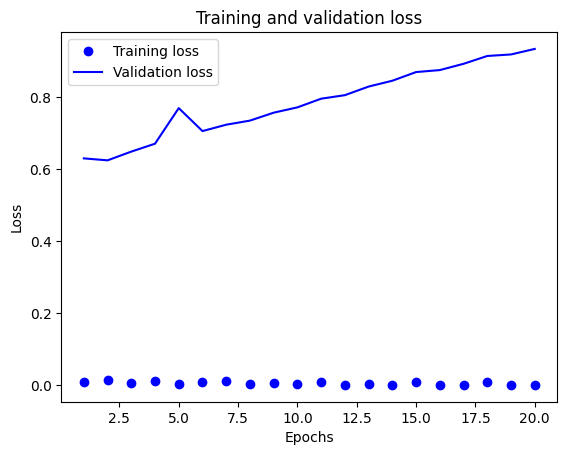

In [27]:
#Plotting the training loss vs validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

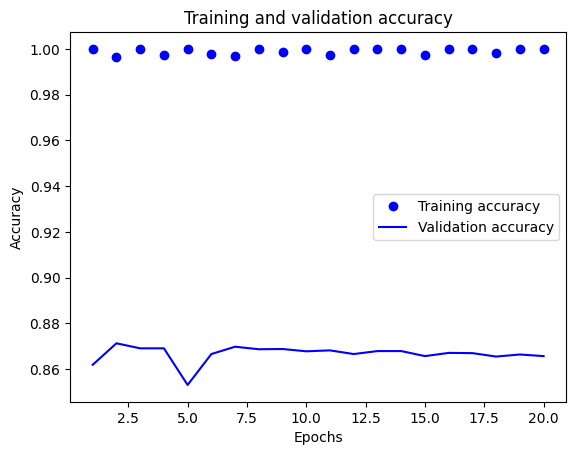

In [28]:
#Plotting training accuracy vs validatition accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Further investigation may be required to improve the model's performance, including adjusting hyperparameters or implementing regularization techniques. Retraining the model could also be beneficial.

Hence, Model Retraining

In [29]:

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_training, y_training, epochs=4, batch_size=512)
results = model.evaluate(x_testing, y_testing)

Epoch 1/4
,49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7393 - loss: 0.5369
,Epoch 2/4
,49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9039 - loss: 0.2734
,Epoch 3/4
,49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9283 - loss: 0.2039
,Epoch 4/4
,49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9429 - loss: 0.1691
,782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8727 - loss: 0.3131


In [30]:
results


[0.31348639726638794, 0.8745999932289124]

88% of Accuracy on the test dataset. The loss value test is 0.2828.

In [31]:
model.predict(x_testing)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


array([[0.12723573],
       [0.998984  ],
       [0.38343886],
       ...,
       [0.07820655],
       [0.04274071],
       [0.47811833]], dtype=float32)

Building a Neural network with 1- hidden layer

In [32]:

model_1_layer = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_1_layer.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val1 = x_training[:10000]
partial_x_training = x_training[10000:]

y_val1 = y_training[:10000]
partial_y_training = y_training[10000:]


history1_layer = model_1_layer.fit(partial_x_training,
                    partial_y_training,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val1, y_val1))

Epoch 1/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.6929 - loss: 0.5936 - val_accuracy: 0.7923 - val_loss: 0.4606
,Epoch 2/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8832 - loss: 0.3729 - val_accuracy: 0.8762 - val_loss: 0.3463
,Epoch 3/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9112 - loss: 0.2875 - val_accuracy: 0.8880 - val_loss: 0.3049
,Epoch 4/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9268 - loss: 0.2396 - val_accuracy: 0.8884 - val_loss: 0.2871
,Epoch 5/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9362 - loss: 0.2049 - val_accuracy: 0.8903 - val_loss: 0.2797
,Epoch 6/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9477 - loss: 0.1768 - val_accuracy: 0.8878 - val_loss: 0.2771
,Epoch 7/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9509 - loss: 0.1623 - val_accuracy: 0.8879 - val_loss: 0.2758
,Epoch 8/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9561 - loss: 0.1482 - val_accur

In [33]:
history_dict1 = history1_layer.history
history_dict1.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

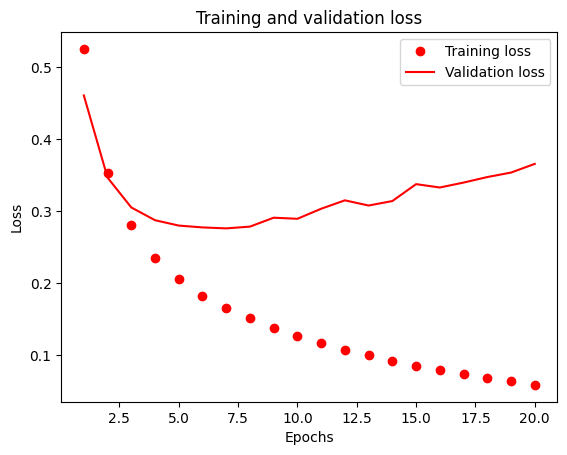

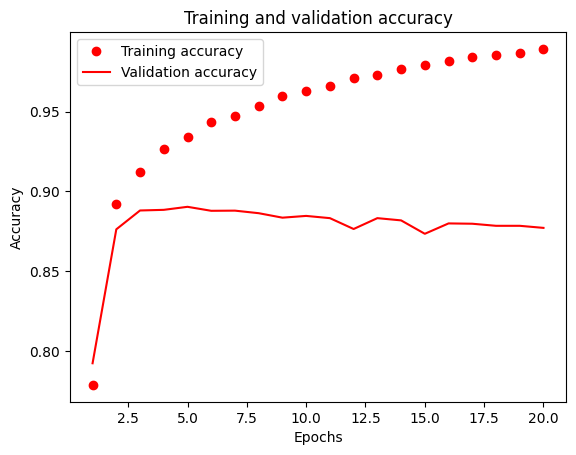

In [34]:
import matplotlib.pyplot as plt
history_dict1 = history1_layer.history
loss_value1 = history_dict1["loss"]
val_loss_value1 = history_dict1["val_loss"]
epochs1 = range(1, len(loss_value1) + 1)

#Plotting graph of Training and Validation loss
plt.plot(epochs1, loss_value1, "ro", label="Training loss")
plt.plot(epochs1, val_loss_value1, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plotting graph of Training and Validation Accuracy
plt.clf()
accuracy1 = history_dict1["accuracy"]
val_accuracy1 = history_dict1["val_accuracy"]
plt.plot(epochs1, accuracy1, "ro", label="Training accuracy")
plt.plot(epochs1, val_accuracy1, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [35]:
model_1_layer = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_1_layer.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_1_layer.fit(x_training, y_training, epochs=5, batch_size=512)
result_1_layer = model_1_layer.evaluate(x_testing, y_testing)

Epoch 1/5
,49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7492 - loss: 0.5517
,Epoch 2/5
,49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8955 - loss: 0.3171
,Epoch 3/5
,49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9173 - loss: 0.2462
,Epoch 4/5
,49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9265 - loss: 0.2125
,Epoch 5/5
,49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9397 - loss: 0.1843
,782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8824 - loss: 0.2824


In [36]:
print(result_1_layer)

#The loss on the test set is 0.2778, and the accuracy is 88.85%.

[0.2821040749549866, 0.8849200010299683]


In [37]:
model_1_layer.predict(x_testing)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.22463328],
       [0.9991414 ],
       [0.6925419 ],
       ...,
       [0.0963963 ],
       [0.06661544],
       [0.43735105]], dtype=float32)

Building a Neural network with 3 hidden layers

In [38]:

model_3_layers = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_3_layers.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_val3 = x_training[:10000]
partial_x_training = x_training[10000:]

y_val3 = y_training[:10000]
partial_y_training = y_training[10000:]

history_3_layers = model_3_layers.fit(partial_x_training,
                    partial_y_training,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val3, y_val3))

Epoch 1/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.6498 - loss: 0.6524 - val_accuracy: 0.8416 - val_loss: 0.4856
,Epoch 2/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8719 - loss: 0.4235 - val_accuracy: 0.8751 - val_loss: 0.3456
,Epoch 3/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9102 - loss: 0.2830 - val_accuracy: 0.8845 - val_loss: 0.2955
,Epoch 4/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9263 - loss: 0.2123 - val_accuracy: 0.8836 - val_loss: 0.2915
,Epoch 5/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9418 - loss: 0.1750 - val_accuracy: 0.8877 - val_loss: 0.2791
,Epoch 6/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9580 - loss: 0.1405 - val_accuracy: 0.8851 - val_loss: 0.3003
,Epoch 7/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9630 - loss: 0.1200 - val_accuracy: 0.8775 - val_loss: 0.3129
,Epoch 8/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9722 - loss: 0.0987 - val_accur

In [40]:
history_dict_3 = history_3_layers.history
history_dict_3.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

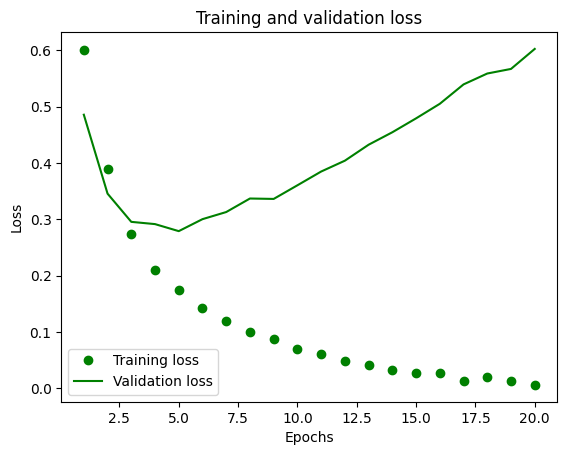

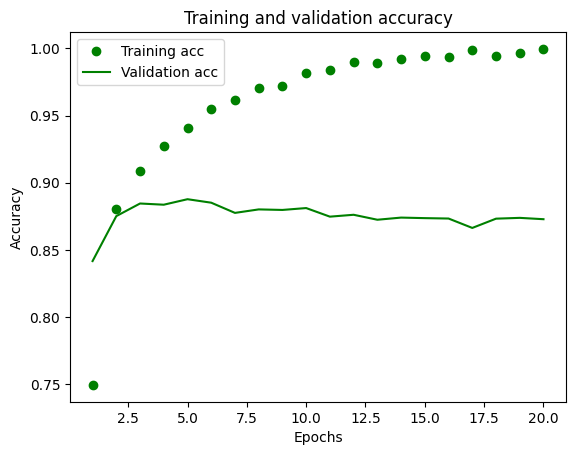

In [41]:
loss_val3 = history_dict_3["loss"]
val_loss_val3 = history_dict_3["val_loss"]
epochs3 = range(1, len(loss_val3) + 1)
plt.plot(epochs3, loss_val3, "go", label="Training loss")
plt.plot(epochs3, val_loss_val3, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
accuracy3 = history_dict_3["accuracy"]
val_accuracy3 = history_dict_3["val_accuracy"]
plt.plot(epochs3, accuracy3, "go", label="Training acc")
plt.plot(epochs3, val_accuracy3, "g", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [42]:
model_3_layers = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


model_3_layers.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_3_layers.fit(x_training, y_training, epochs=3, batch_size=512)
results_3_layers = model_3_layers.evaluate(x_testing, y_testing)

Epoch 1/3
,49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7271 - loss: 0.5638
,Epoch 2/3
,49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9079 - loss: 0.2748
,Epoch 3/3
,49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9259 - loss: 0.2076
,782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8817 - loss: 0.2913


In [43]:
print(results_3_layers)

[0.291461706161499, 0.8820400238037109]


In [44]:
model_3_layers.predict(x_testing)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.18717457],
       [0.9983722 ],
       [0.81838924],
       ...,
       [0.11736706],
       [0.08318631],
       [0.50407326]], dtype=float32)

Increasing the number of layers does not significantly improve the model's accuracy. However, among the three models, the one with three layers performs the best. Determining the number of units in the hidden layers is a key aspect of designing the neural network's architecture. While these layers do not directly interact with the external environment, they play a crucial role in influencing the final outcome.

Building Neural Network with 32 units & 3 layers.

In [45]:


model_32_units = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#model compilation
model_32_units.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
#model validation
x_val_32 = x_training[:10000]
partial_x_training = x_training[10000:]

y_val_32 = y_training[:10000]
partial_y_training = y_training[10000:]


history_32_units = model_32_units.fit(partial_x_training,
                    partial_y_training,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_32, y_val_32))


Epoch 1/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.6783 - loss: 0.6105 - val_accuracy: 0.8458 - val_loss: 0.3932
,Epoch 2/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.8815 - loss: 0.3283 - val_accuracy: 0.8694 - val_loss: 0.3197
,Epoch 3/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9186 - loss: 0.2279 - val_accuracy: 0.8671 - val_loss: 0.3305
,Epoch 4/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.9389 - loss: 0.1764 - val_accuracy: 0.8707 - val_loss: 0.3249
,Epoch 5/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9518 - loss: 0.1422 - val_accuracy: 0.8817 - val_loss: 0.3170
,Epoch 6/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9560 - loss: 0.1244 - val_accuracy: 0.8722 - val_loss: 0.3474
,Epoch 7/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9685 - loss: 0.0942 - val_accuracy: 0.8815 - val_loss: 0.3456
,Epoch 8/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9789 - loss: 0.0707 - val_accur

In [46]:
history_dict_32 = history_32_units.history
history_dict_32.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

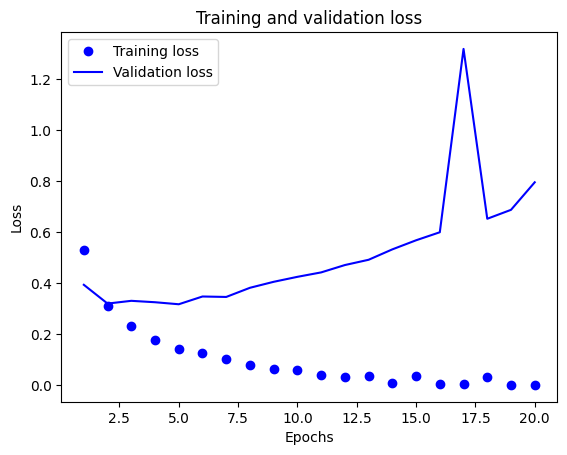

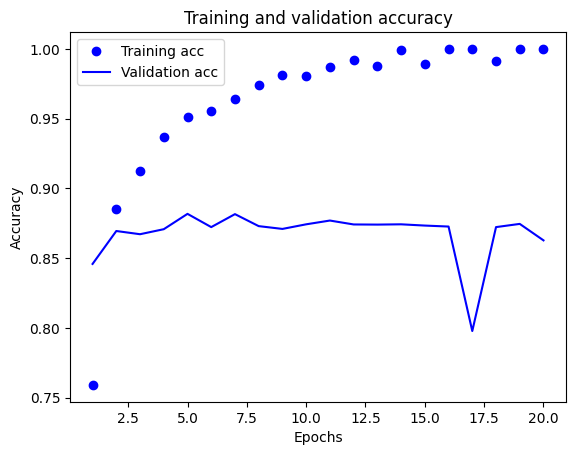

In [47]:
loss_value_32 = history_dict_32["loss"]
val_loss_value_32 = history_dict_32["val_loss"]
epochs_32 = range(1, len(loss_value_32) + 1)
plt.plot(epochs_32, loss_value_32, "bo", label="Training loss")
plt.plot(epochs_32, val_loss_value_32, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
accuracy_32 = history_dict_32["accuracy"]
val_accuracy_32 = history_dict_32["val_accuracy"]
plt.plot(epochs_32, accuracy_32, "bo", label="Training acc")
plt.plot(epochs_32, val_accuracy_32, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [48]:
history_32_units = model_32_units.fit(x_training, y_training, epochs=3, batch_size=512)
results_32_units = model_32_units.evaluate(x_testing, y_testing)
results_32_units

Epoch 1/3
,49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9361 - loss: 0.3293
,Epoch 2/3
,49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9671 - loss: 0.1059
,Epoch 3/3
,49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9765 - loss: 0.0749
,782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8593 - loss: 0.4418


[0.4395117461681366, 0.8609600067138672]

In [49]:
model_32_units.predict(x_testing)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.01026413],
       [0.9999697 ],
       [0.02562981],
       ...,
       [0.0182719 ],
       [0.01120655],
       [0.4132271 ]], dtype=float32)

 validation set accuracy = 86.8%

 Having the model with 64 units & 2 layers.

In [51]:
model_64_units = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_64_units.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_val_64 = x_training[:10000]
partial_x_training = x_training[10000:]

y_val_64 = y_training[:10000]
partial_y_training = y_training[10000:]

history_64 = model_64_units.fit(partial_x_training,
                    partial_y_training,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_64, y_val_64))

Epoch 1/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.6600 - loss: 0.6028 - val_accuracy: 0.8479 - val_loss: 0.3833
,Epoch 2/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8863 - loss: 0.3155 - val_accuracy: 0.8795 - val_loss: 0.2964
,Epoch 3/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.9156 - loss: 0.2279 - val_accuracy: 0.8892 - val_loss: 0.2727
,Epoch 4/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.9361 - loss: 0.1790 - val_accuracy: 0.8882 - val_loss: 0.2748
,Epoch 5/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9531 - loss: 0.1386 - val_accuracy: 0.8797 - val_loss: 0.3078
,Epoch 6/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9517 - loss: 0.1262 - val_accuracy: 0.8850 - val_loss: 0.3003
,Epoch 7/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.9727 - loss: 0.0892 - val_accuracy: 0.8813 - val_loss: 0.3189
,Epoch 8/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9704 - loss: 0.0888 - val_accu

In [52]:
history_dict_64 = history_64.history
history_dict_64.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

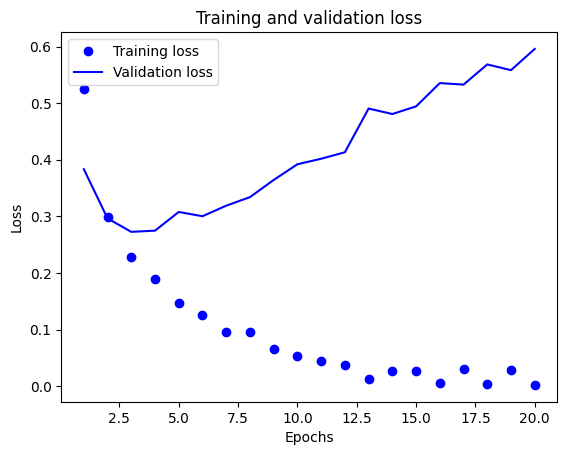

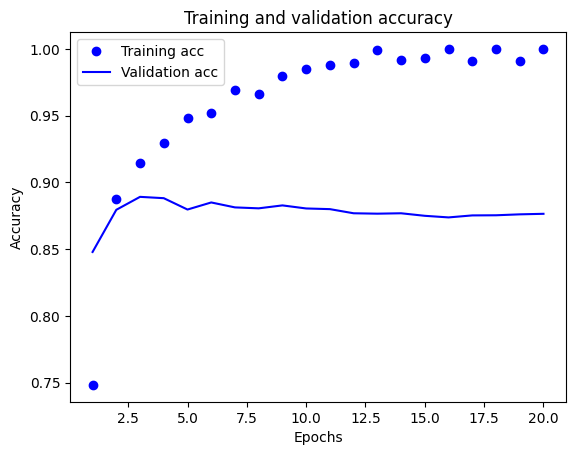

In [53]:
loss_value64 = history_dict_64["loss"]
val_loss_value64 = history_dict_64["val_loss"]
epochs_64 = range(1, len(loss_value64) + 1)
plt.plot(epochs_64, loss_value64, "bo", label="Training loss")
plt.plot(epochs_64, val_loss_value64, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
accuracy_64 = history_dict_64["accuracy"]
val_accuracy_64 = history_dict_64["val_accuracy"]
plt.plot(epochs_64, accuracy_64, "bo", label="Training acc")
plt.plot(epochs_64, val_accuracy_64, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [54]:
history_64 = model_64_units.fit(x_training, y_training, epochs=3, batch_size=512)
results_64_units = model_64_units.evaluate(x_testing, y_testing)
results_64_units

Epoch 1/3
,49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9430 - loss: 0.2254
,Epoch 2/3
,49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9659 - loss: 0.1024
,Epoch 3/3
,49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9813 - loss: 0.0600
,782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8691 - loss: 0.3885


[0.3872556984424591, 0.8697599768638611]

In [55]:
model_64_units.predict(x_testing)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


array([[0.03017876],
       [0.99999994],
       [0.8789862 ],
       ...,
       [0.03584768],
       [0.01182079],
       [0.95851517]], dtype=float32)

 validation set accuracy = 86.61%

Training the model with 128 units & 3 layers

In [56]:

model_128units = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_128units.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_val_128 = x_training[:10000]
partial_x_training = x_training[10000:]

y_val_128 = y_training[:10000]
partial_y_training = y_training[10000:]

history_128 = model_128units.fit(partial_x_training,
                    partial_y_training,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_128, y_val_128))

Epoch 1/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step - accuracy: 0.6259 - loss: 0.6292 - val_accuracy: 0.8547 - val_loss: 0.3549
,Epoch 2/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.8664 - loss: 0.3254 - val_accuracy: 0.8685 - val_loss: 0.3144
,Epoch 3/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9143 - loss: 0.2216 - val_accuracy: 0.8110 - val_loss: 0.4528
,Epoch 4/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.9301 - loss: 0.1798 - val_accuracy: 0.8866 - val_loss: 0.2738
,Epoch 5/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.9551 - loss: 0.1241 - val_accuracy: 0.8838 - val_loss: 0.3249
,Epoch 6/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.9704 - loss: 0.0919 - val_accuracy: 0.8782 - val_loss: 0.3604
,Epoch 7/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9794 - loss: 0.0666 - val_accuracy: 0.8814 - val_loss: 0.3756
,Epoch 8/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.9917 - loss: 0.0345 - val_a

In [57]:
history_dict_128 = history_128.history
history_dict_128.keys()



dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

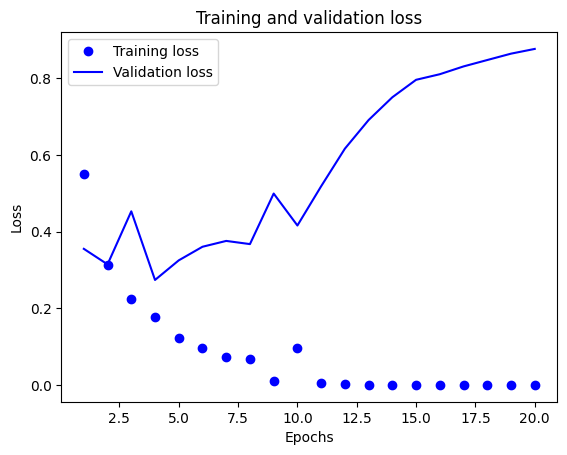

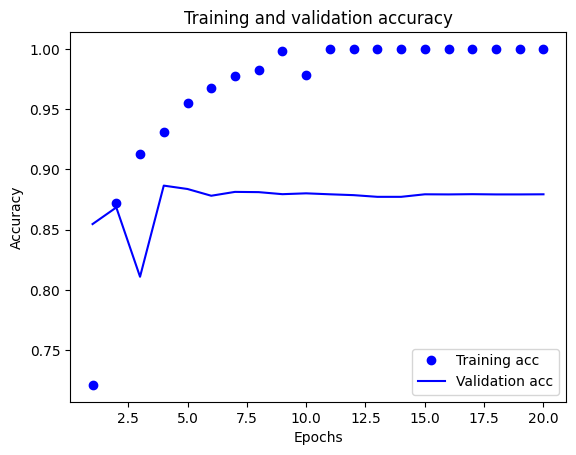

In [58]:
loss_value128 = history_dict_128["loss"]
val_loss_value128 = history_dict_128["val_loss"]
epochs_128 = range(1, len(loss_value128) + 1)
plt.plot(epochs_128, loss_value128, "bo", label="Training loss")
plt.plot(epochs_128, val_loss_value128, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
accuracy_128 = history_dict_128["accuracy"]
val_accuracy_128 = history_dict_128["val_accuracy"]
plt.plot(epochs_128, accuracy_128, "bo", label="Training acc")
plt.plot(epochs_128, val_accuracy_128, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [59]:
history_128 = model_128units.fit(x_training, y_training, epochs=2, batch_size=512)
results_128_units = model_128units.evaluate(x_testing, y_testing)
results_128_units

Epoch 1/2
,49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.9285 - loss: 0.3513
,Epoch 2/2
,49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - accuracy: 0.9710 - loss: 0.0874
,782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8618 - loss: 0.3781


[0.3809712529182434, 0.8611999750137329]

In [60]:
model_128units.predict(x_testing)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


array([[0.00632516],
       [0.9999979 ],
       [0.2655138 ],
       ...,
       [0.02949629],
       [0.00546507],
       [0.7890363 ]], dtype=float32)

MSE Loss Function model with 16 units and 3-layers

In [62]:

MSE_model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
# compilation of model
MSE_model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
# validation of model
x_val_MSE = x_training[:10000]
partial_x_training = x_training[10000:]

y_val_MSE = y_training[:10000]
partial_y_training = y_training[10000:]
# Model Fit

history_MSE = MSE_model.fit(partial_x_training,
                    partial_y_training,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_MSE, y_val_MSE))

Epoch 1/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.6882 - loss: 0.2213 - val_accuracy: 0.8304 - val_loss: 0.1463
,Epoch 2/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8738 - loss: 0.1212 - val_accuracy: 0.8575 - val_loss: 0.1132
,Epoch 3/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9130 - loss: 0.0795 - val_accuracy: 0.8810 - val_loss: 0.0912
,Epoch 4/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9318 - loss: 0.0618 - val_accuracy: 0.8841 - val_loss: 0.0860
,Epoch 5/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9442 - loss: 0.0495 - val_accuracy: 0.8864 - val_loss: 0.0834
,Epoch 6/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9527 - loss: 0.0439 - val_accuracy: 0.8716 - val_loss: 0.0932
,Epoch 7/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9629 - loss: 0.0361 - val_accuracy: 0.8843 - val_loss: 0.0864
,Epoch 8/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9682 - loss: 0.0315 - val_accur

In [63]:
historydict_MSE = history_MSE.history
historydict_MSE.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

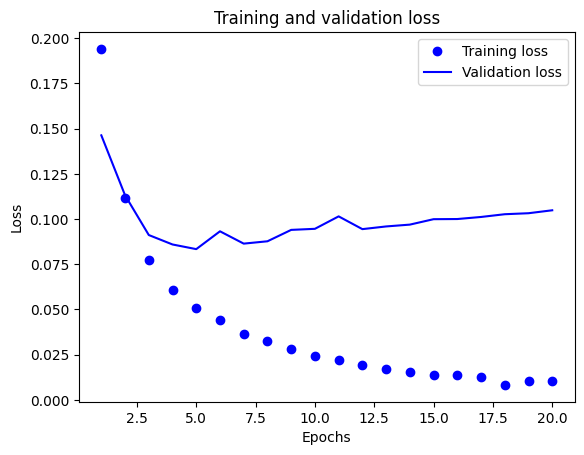

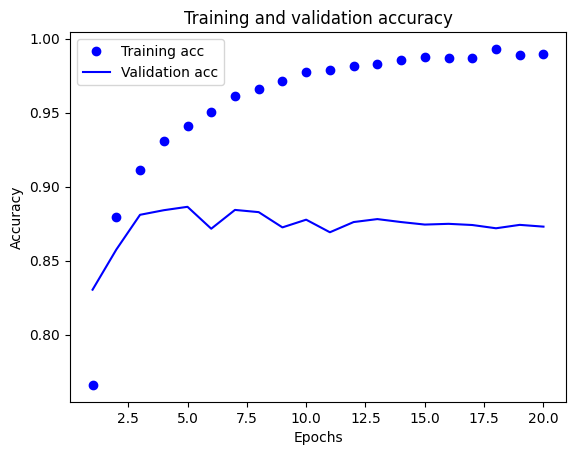

In [64]:
import matplotlib.pyplot as plt
loss_value_MSE = historydict_MSE["loss"]
val_loss_value_MSE = historydict_MSE["val_loss"]
epochs_MSE = range(1, len(loss_value_MSE) + 1)
plt.plot(epochs_MSE, loss_value_MSE, "bo", label="Training loss")
plt.plot(epochs_MSE, val_loss_value_MSE, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
acc_MSE = historydict_MSE["accuracy"]
val_acc_MSE = historydict_MSE["val_accuracy"]
plt.plot(epochs_MSE, acc_MSE, "bo", label="Training acc")
plt.plot(epochs_MSE, val_acc_MSE, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [65]:
MSE_model.fit(x_training, y_training, epochs=8, batch_size=512)
results_MSE = MSE_model.evaluate(x_testing, y_testing)
results_MSE

Epoch 1/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9469 - loss: 0.0447
,Epoch 2/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9605 - loss: 0.0357
,Epoch 3/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9652 - loss: 0.0308
,Epoch 4/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9717 - loss: 0.0267
,Epoch 5/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9754 - loss: 0.0239
,Epoch 6/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9778 - loss: 0.0216
,Epoch 7/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9808 - loss: 0.0193
,Epoch 8/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.9831 - loss: 0.0172
,782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8621 - loss: 0.1146


[0.1122540831565857, 0.864799976348877]

In [66]:
MSE_model.predict(x_testing)

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step


array([[0.03842396],
       [0.99999994],
       [0.99931395],
       ...,
       [0.04047134],
       [0.00845015],
       [0.8318963 ]], dtype=float32)

In [67]:

tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

tanh.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

x_val_tanh = x_training[:10000]
partial_x_training = x_training[10000:]

y_val_tanh = y_training[:10000]
partial_y_training = y_training[10000:]


historytanh_model = tanh.fit(partial_x_training,
                    partial_y_training,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_tanh, y_val_tanh))

Epoch 1/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.7100 - loss: 0.1999 - val_accuracy: 0.8589 - val_loss: 0.1302
,Epoch 2/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8841 - loss: 0.1129 - val_accuracy: 0.8786 - val_loss: 0.1058
,Epoch 3/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9121 - loss: 0.0854 - val_accuracy: 0.8723 - val_loss: 0.1007
,Epoch 4/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9226 - loss: 0.0729 - val_accuracy: 0.8841 - val_loss: 0.0903
,Epoch 5/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9395 - loss: 0.0613 - val_accuracy: 0.8742 - val_loss: 0.0932
,Epoch 6/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9392 - loss: 0.0567 - val_accuracy: 0.8867 - val_loss: 0.0854
,Epoch 7/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9504 - loss: 0.0500 - val_accuracy: 0.8813 - val_loss: 0.0884
,Epoch 8/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9534 - loss: 0.0462 - val_accur

In [68]:
historydict_tanh = historytanh_model.history
historydict_tanh.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

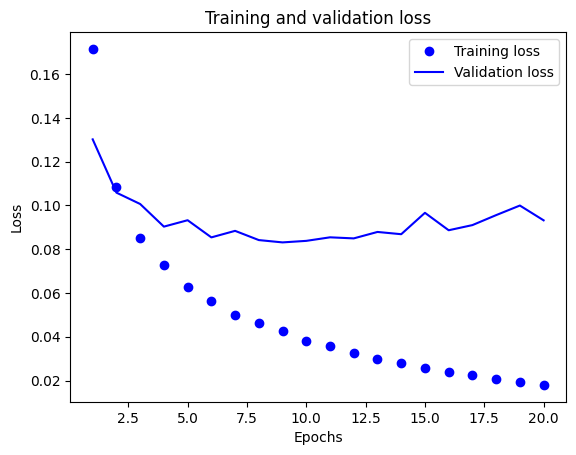

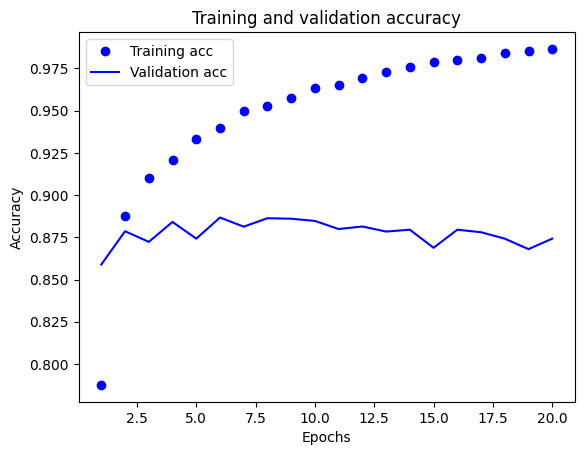

In [69]:
loss_value_tanh= historydict_tanh["loss"]
val_loss_value_tanh = historydict_tanh["val_loss"]
epochs_tanh = range(1, len(loss_value_tanh) + 1)
plt.plot(epochs_tanh, loss_value_tanh, "bo", label="Training loss")
plt.plot(epochs_tanh, val_loss_value_tanh, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc_tanh = historydict_tanh["accuracy"]
val_acc_tanh = historydict_tanh["val_accuracy"]
plt.plot(epochs_tanh, acc_tanh, "bo", label="Training acc")
plt.plot(epochs_tanh, val_acc_tanh, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [70]:
tanh.fit(x_training, y_training, epochs=8, batch_size=512)
results_tanh = tanh.evaluate(x_testing, y_testing)
results_tanh

Epoch 1/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9458 - loss: 0.0455
,Epoch 2/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9543 - loss: 0.0399
,Epoch 3/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9615 - loss: 0.0358
,Epoch 4/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9653 - loss: 0.0332
,Epoch 5/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9688 - loss: 0.0303
,Epoch 6/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9723 - loss: 0.0275
,Epoch 7/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.9727 - loss: 0.0274
,Epoch 8/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9769 - loss: 0.0240
,782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8648 - loss: 0.1062


[0.10355494916439056, 0.8683599829673767]

Adam Operator with 16 units and 3-layers

In [72]:


adam = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
     layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

adam.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_adam = x_training[:10000]
partial_x_training = x_training[10000:]

y_adam = y_training[:10000]
partial_y_training = y_training[10000:]


historyadam = adam.fit(partial_x_training,
                    partial_y_training,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_adam, y_adam))

Epoch 1/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.6189 - loss: 0.6509 - val_accuracy: 0.8403 - val_loss: 0.4716
,Epoch 2/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.8877 - loss: 0.3853 - val_accuracy: 0.8871 - val_loss: 0.2992
,Epoch 3/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9292 - loss: 0.2156 - val_accuracy: 0.8897 - val_loss: 0.2765
,Epoch 4/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9557 - loss: 0.1464 - val_accuracy: 0.8841 - val_loss: 0.2970
,Epoch 5/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9703 - loss: 0.1045 - val_accuracy: 0.8857 - val_loss: 0.3089
,Epoch 6/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9831 - loss: 0.0690 - val_accuracy: 0.8832 - val_loss: 0.3456
,Epoch 7/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9910 - loss: 0.0489 - val_accuracy: 0.8755 - val_loss: 0.3880
,Epoch 8/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9961 - loss: 0.0307 - val_accur

In [73]:
historydict_adam = historyadam.history
historydict_adam.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

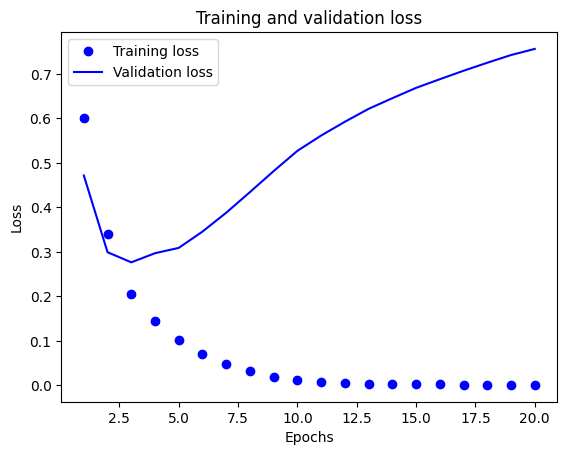

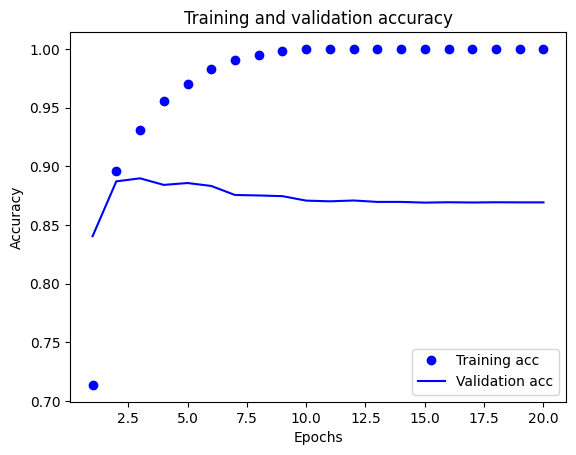

In [74]:
loss_value_adam = historydict_adam["loss"]
val_loss_value_adam = historydict_adam["val_loss"]
epochs_adam = range(1, len(loss_value_adam) + 1)
plt.plot(epochs_adam, loss_value_adam, "bo", label="Training loss")
plt.plot(epochs_adam, val_loss_value_adam, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
acc_adam = historydict_adam["accuracy"]
val_acc_adam = historydict_adam["val_accuracy"]
plt.plot(epochs_adam, acc_adam, "bo", label="Training acc")
plt.plot(epochs_adam, val_acc_adam, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [75]:
adam.fit(x_training, y_training, epochs=4, batch_size=512)
results_adam = adam.evaluate(x_testing, y_testing)
results_adam

Epoch 1/4
,49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9395 - loss: 0.2815
,Epoch 2/4
,49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9665 - loss: 0.1092
,Epoch 3/4
,49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9840 - loss: 0.0661
,Epoch 4/4
,49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9926 - loss: 0.0402
,782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8576 - loss: 0.5332


[0.5333347320556641, 0.8586400151252747]

Regularization model with 16 units and 2-layers

In [76]:
#Regularization

from tensorflow.keras import regularizers
regularization = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
regularization.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_regularization = regularization.fit(partial_x_training,
                    partial_y_training,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
historydict_regularization = history_regularization.history
historydict_regularization.keys()

Epoch 1/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.6939 - loss: 0.6480 - val_accuracy: 0.8645 - val_loss: 0.4436
,Epoch 2/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8856 - loss: 0.3976 - val_accuracy: 0.8741 - val_loss: 0.3727
,Epoch 3/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9128 - loss: 0.3100 - val_accuracy: 0.8852 - val_loss: 0.3384
,Epoch 4/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.9282 - loss: 0.2632 - val_accuracy: 0.8740 - val_loss: 0.3613
,Epoch 5/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9368 - loss: 0.2405 - val_accuracy: 0.8741 - val_loss: 0.3674
,Epoch 6/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9520 - loss: 0.2123 - val_accuracy: 0.8747 - val_loss: 0.3673
,Epoch 7/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9533 - loss: 0.2043 - val_accuracy: 0.8685 - val_loss: 0.3972
,Epoch 8/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9588 - loss: 0.1930 - val_accur

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

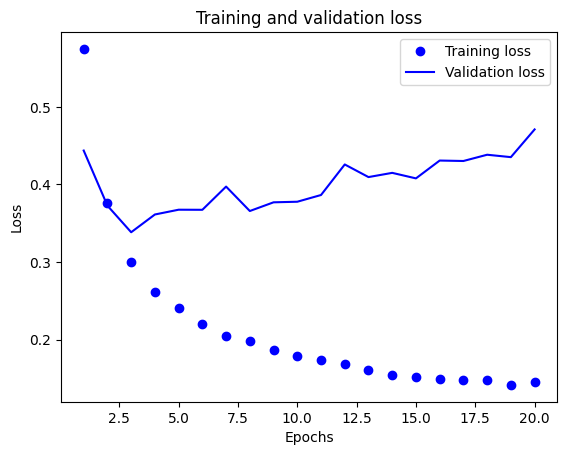

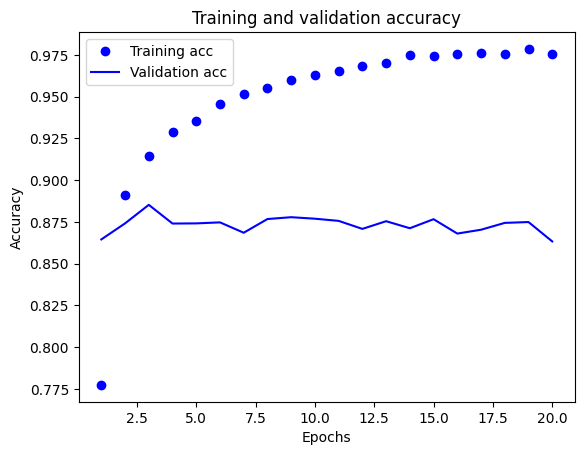

In [77]:
loss_valu = historydict_regularization["loss"]
val_loss_value_r = historydict_regularization["val_loss"]
epochs_r = range(1, len(loss_valu) + 1)
plt.plot(epochs_r, loss_valu, "bo", label="Training loss")
plt.plot(epochs_r, val_loss_value_r, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc_r = historydict_regularization["accuracy"]
val_acc_r = historydict_regularization["val_accuracy"]
plt.plot(epochs_r, acc_r, "bo", label="Training acc")
plt.plot(epochs_r, val_acc_r, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [78]:
regularization.fit(x_training, y_training, epochs=8, batch_size=512)
results_regularization = regularization.evaluate(x_testing, y_testing)
results_regularization

Epoch 1/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9425 - loss: 0.2493
,Epoch 2/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9494 - loss: 0.2120
,Epoch 3/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9547 - loss: 0.1953
,Epoch 4/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9603 - loss: 0.1755
,Epoch 5/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9605 - loss: 0.1776
,Epoch 6/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9629 - loss: 0.1705
,Epoch 7/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9646 - loss: 0.1673
,Epoch 8/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9654 - loss: 0.1671
,782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8648 - loss: 0.4404


[0.43744391202926636, 0.8672000169754028]

Dropout function with 16 units and 3-layers

In [79]:
#Dropout
from tensorflow.keras import regularizers
Dropout = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
Dropout.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_Dropout = Dropout.fit(partial_x_training,
                    partial_y_training,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
historydict_Dropout = history_Dropout.history
historydict_Dropout.keys()

Epoch 1/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.5297 - loss: 0.6868 - val_accuracy: 0.8108 - val_loss: 0.6290
,Epoch 2/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6478 - loss: 0.6287 - val_accuracy: 0.8550 - val_loss: 0.5145
,Epoch 3/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7180 - loss: 0.5507 - val_accuracy: 0.8712 - val_loss: 0.4230
,Epoch 4/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7783 - loss: 0.4825 - val_accuracy: 0.8790 - val_loss: 0.3482
,Epoch 5/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8155 - loss: 0.4268 - val_accuracy: 0.8777 - val_loss: 0.3286
,Epoch 6/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8457 - loss: 0.3764 - val_accuracy: 0.8861 - val_loss: 0.2929
,Epoch 7/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8657 - loss: 0.3354 - val_accuracy: 0.8885 - val_loss: 0.2820
,Epoch 8/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8819 - loss: 0.3148 - val_accur

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

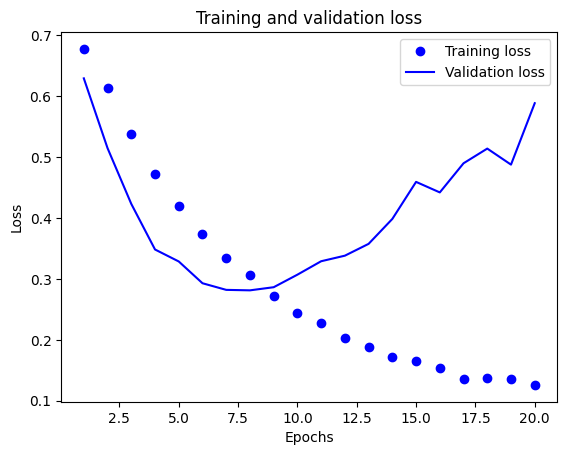

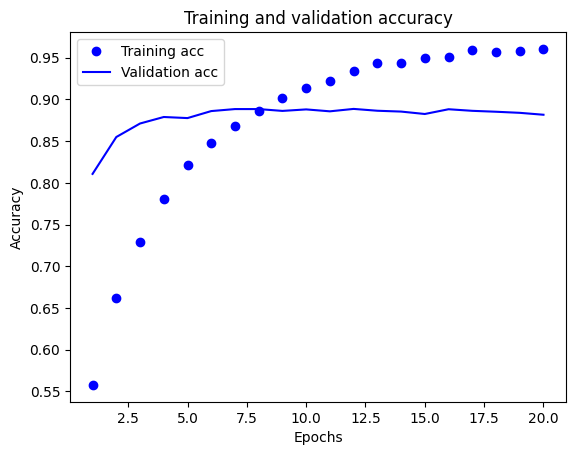

In [80]:
loss_val = historydict_Dropout["loss"]
val_loss_val_d = historydict_Dropout["val_loss"]
epochs_d = range(1, len(loss_val) + 1)
plt.plot(epochs_d, loss_val, "bo", label="Training loss")
plt.plot(epochs_d, val_loss_val_d, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
acc_d = historydict_Dropout["accuracy"]
val_acc_d = historydict_Dropout["val_accuracy"]
plt.plot(epochs_d, acc_d, "bo", label="Training acc")
plt.plot(epochs_d, val_acc_d, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [81]:
Dropout.fit(x_training, y_training, epochs=8, batch_size=512)
results_Dropout = Dropout.evaluate(x_testing, y_testing)
results_Dropout

Epoch 1/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9186 - loss: 0.3175
,Epoch 2/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.9259 - loss: 0.2530
,Epoch 3/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9329 - loss: 0.2279
,Epoch 4/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9362 - loss: 0.2027
,Epoch 5/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9397 - loss: 0.2026
,Epoch 6/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9423 - loss: 0.1796
,Epoch 7/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9468 - loss: 0.1709
,Epoch 8/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9444 - loss: 0.1722
,782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8687 - loss: 0.5022


[0.49367278814315796, 0.8720800280570984]

Training the model with hyper tuned parameters with 32 units and 3 -layers

In [82]:
#Training model with hyper tuned parameters

from tensorflow.keras import regularizers
Hyper = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
Hyper.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

history_Hyper = Hyper.fit(partial_x_training,
                    partial_y_training,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dictHyper = history_Hyper.history
history_dictHyper.keys()

Epoch 1/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.5368 - loss: 0.2596 - val_accuracy: 0.8107 - val_loss: 0.2245
,Epoch 2/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.6723 - loss: 0.2218 - val_accuracy: 0.8497 - val_loss: 0.1567
,Epoch 3/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7696 - loss: 0.1767 - val_accuracy: 0.8518 - val_loss: 0.1283
,Epoch 4/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8406 - loss: 0.1396 - val_accuracy: 0.8718 - val_loss: 0.1067
,Epoch 5/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8661 - loss: 0.1189 - val_accuracy: 0.8811 - val_loss: 0.1005
,Epoch 6/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.8953 - loss: 0.1002 - val_accuracy: 0.8853 - val_loss: 0.0974
,Epoch 7/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9136 - loss: 0.0856 - val_accuracy: 0.8833 - val_loss: 0.1014
,Epoch 8/20
,30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.9218 - loss: 0.0790 - val_accur

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

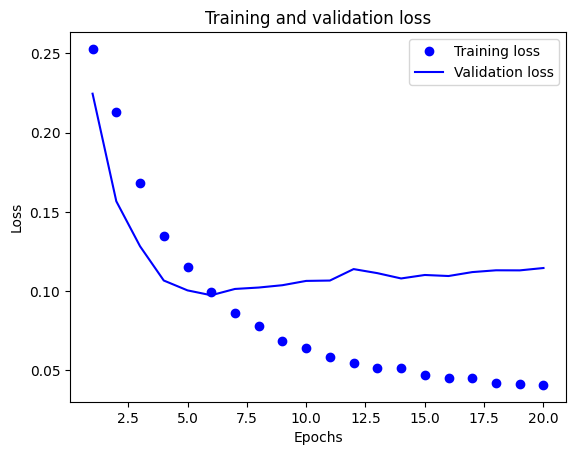

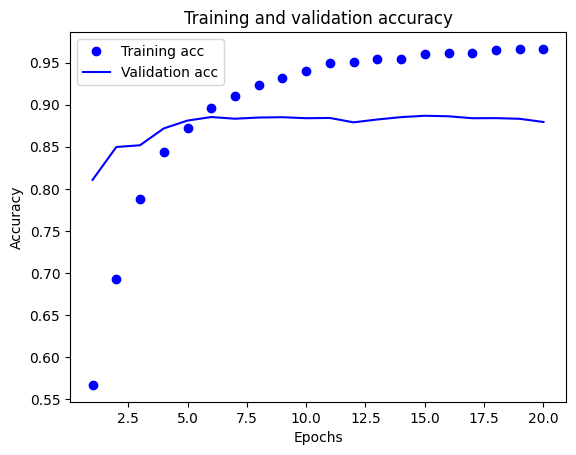

In [83]:
loss_va_h = history_dictHyper["loss"]
val_loss_va_h = history_dictHyper["val_loss"]
epochs_h = range(1, len(loss_va_h) + 1)
plt.plot(epochs_h, loss_va_h, "bo", label="Training loss")
plt.plot(epochs_h, val_loss_va_h, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
acc_h = history_dictHyper["accuracy"]
val_acc_h = history_dictHyper["val_accuracy"]
plt.plot(epochs_h, acc_h, "bo", label="Training acc")
plt.plot(epochs_h, val_acc_h, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [84]:
Hyper.fit(x_training, y_training, epochs=8, batch_size=512)
results_Hyper = Hyper.evaluate(x_testing, y_testing)
results_Hyper

Epoch 1/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9256 - loss: 0.0746
,Epoch 2/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9359 - loss: 0.0675
,Epoch 3/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9387 - loss: 0.0624
,Epoch 4/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9436 - loss: 0.0589
,Epoch 5/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9476 - loss: 0.0566
,Epoch 6/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.9506 - loss: 0.0547
,Epoch 7/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.9523 - loss: 0.0505
,Epoch 8/8
,49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9565 - loss: 0.0498
,782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8770 - loss: 0.1173


[0.11517563462257385, 0.8793200254440308]

In [85]:
#Summary
Models_Loss= np.array([results_Dropout[0],results_Hyper[0],results_MSE[0],results_regularization[0],results_tanh[0]])*100
Models_Loss
Models_Accuracy= np.array([results_Dropout[1],results_Hyper[1],results_MSE[1],results_regularization[1],results_tanh[1]])*100
Models_Accuracy
Labels=['Model_Dropout','Model_Hyper','Model_MSE','model_regularization','model_tanh']
plt.clf()

<Figure size 640x480 with 0 Axes>

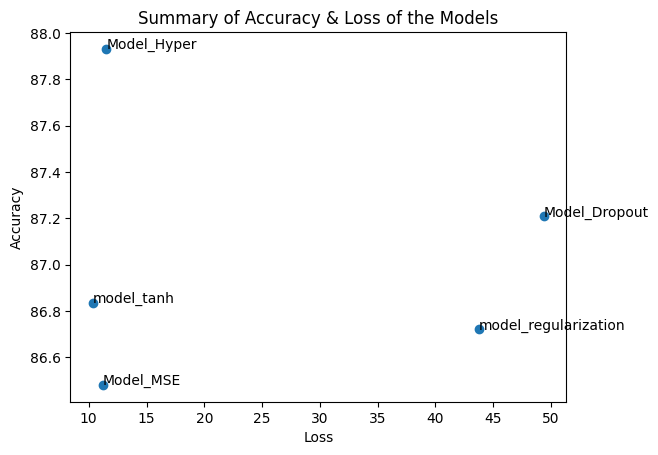

In [86]:
#Compilation

fig, ax = plt.subplots()
ax.scatter(Models_Loss,Models_Accuracy)
for i, txt in enumerate(Labels):
    ax.annotate(txt, (Models_Loss[i],Models_Accuracy[i] ))
plt.title("Summary of Accuracy & Loss of the Models")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

Initially, the data was imported, and the analysis settings were configured. A basic neural network with a single hidden layer containing 16 units was built, utilizing binary crossentropy and ReLU activation. To enhance the model's performance, further experimentation was carried out. This involved adjusting the number of units per layer (to 32, 64, and 128) and varying the number of hidden layers (from one to three). Increasing the number of hidden units generally improved accuracy, but it also raised the risk of overfitting. Additionally, replacing binary crossentropy with mean squared error (MSE) loss did not result in any noticeable change in model performance. In conclusion, while modifying the architecture and parameters could boost accuracy, careful consideration was necessary to choose appropriate loss functions and prevent overfitting.